In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
paths = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
files = os.listdir(".")
print(files)

['var', 'tmp', 'mnt', 'lib64', 'usr', 'sbin', 'libx32', 'lib32', 'srv', 'home', 'run', 'bin', 'etc', 'dev', 'sys', 'lib', 'opt', 'media', 'root', 'boot', 'proc', '.virtual_documents', '.dockerenv', 'train.csv', 'series_test.parquet', 'logs', 'kaggle', 'series_train.parquet', 'child-mind-institute-problematic-internet-use.zip', 'sample_submission.csv', 'data_dictionary.csv', 'test.csv', '.jupyter', 'install_packages.sh', 'run_jupyter.sh', 'entrypoint.sh']


In [5]:
# PATH = '/kaggle/input/child-mind-institute-problematic-internet-use/'
PATH = ''
# sample_submission = pd.read_csv(PATH+'sample_submission.csv') # id, sii
data_dictionary = pd.read_csv(PATH+'data_dictionary.csv') # feature metadata 80 features
train_data = pd.read_csv(PATH+'train.csv')
test_data = pd.read_csv(PATH+'test.csv')

In [6]:
sample = pd.read_parquet(f'{PATH}/series_train.parquet/id=b9e90f7f/part-0.parquet')

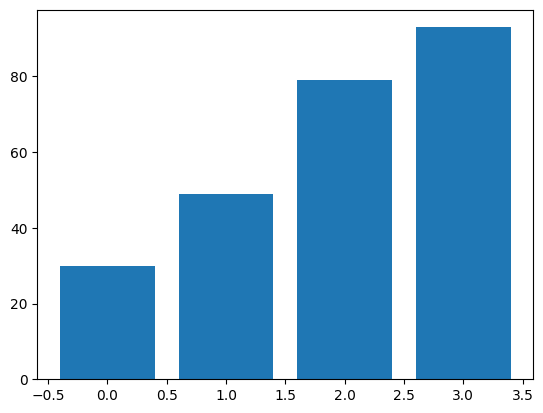

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(train_data['sii'], train_data['PCIAT-PCIAT_Total'])
plt.show()

In [8]:
train_with_lbl = train_data.dropna(subset=['sii'])
train_with_lbl.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2736.000000,2736.000000,2342.000000,2527.000000,2530.000000,2572.000000,483.000000,2478.000000,2486.000000,2478.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2527.000000,2525.000000,2654.000000,2736.000000
mean,10.238670,0.364401,65.159266,19.125667,55.897051,87.839592,26.625259,69.755044,81.823411,117.127926,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,40.977839,57.647525,1.015072,0.580409
std,3.427982,0.481350,11.811050,4.909305,7.394938,43.353079,5.230213,13.790203,13.769816,17.221707,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.231384,13.042815,1.080861,0.771122
min,5.000000,0.000000,25.000000,0.000000,36.000000,0.000000,19.000000,11.000000,27.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.773447,50.050000,57.200000,23.000000,61.000000,73.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.819010,55.000000,75.800000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,12.000000,1.000000,75.000000,21.172311,61.750000,111.450000,29.000000,76.000000,91.000000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,95.000000,46.102914,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [61]:
result = train_with_lbl.groupby('sii').size().reset_index(name='count')
print(result)
label_counts = [1594, 730, 378, 34]

   sii  count
0  0.0   1594
1  1.0    730
2  2.0    378
3  3.0     34


In [10]:
feature = 'FGC-FGC_TL_Zone'
train_data[feature].describe()
train_data[feature].unique()

array([ 1.,  0., nan])

In [11]:
features = list(test_data.columns)
print(features)

['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total', 'PAQ_C-Season', 'PAQ_C-PAQ_C

In [62]:
from scipy.stats import skew, boxcox
from math import log

## preproc_info
class FeatureInfo:
    season_features = [
        "Basic_Demos-Enroll_Season",
        "CGAS-Season",
        "Physical-Season",
        "Fitness_Endurance-Season",
        "FGC-Season",
        "BIA-Season",
        "PAQ_A-Season",
        "PAQ_C-Season",
        "SDS-Season",
        "PreInt_EduHx-Season",
    ]
    seasons = ['Spring', 'Summer', 'Fall', 'Winter']

    measurement_features = [
        'Basic_Demos-Age',   
        'CGAS-CGAS_Score',
        'Physical-BMI',
        'Physical-Height',
        'Physical-Weight',
        'Physical-Waist_Circumference',
        'Physical-Diastolic_BP',
        'Physical-HeartRate',
        'Physical-Systolic_BP',   
        'Fitness_Endurance-Max_Stage',
        'Fitness_Endurance-Time_Mins',
        'Fitness_Endurance-Time_Sec',
        'FGC-FGC_CU',
        'FGC-FGC_GSND',
        'FGC-FGC_PU',
        'FGC-FGC_SRL',
        'FGC-FGC_SRR',
        'FGC-FGC_TL',
        'BIA-BIA_BMC',
        'BIA-BIA_BMI',
        'BIA-BIA_BMR',
        'BIA-BIA_DEE',
        'BIA-BIA_ECW',
        'BIA-BIA_FFM',
        'BIA-BIA_FFMI',
        'BIA-BIA_FMI',
        'BIA-BIA_Fat',
        'BIA-BIA_ICW',
        'BIA-BIA_LDM',
        'BIA-BIA_LST',
        'BIA-BIA_SMM',
        'BIA-BIA_TBW',
        'PAQ_A-PAQ_A_Total',
        'PAQ_C-PAQ_C_Total',
        'SDS-SDS_Total_Raw',
        'SDS-SDS_Total_T',
    ]

    min_max_features = {
        'FGC-FGC_CU_Zone': [0, 1],
        'FGC-FGC_GSND_Zone': [1, 3],
        'FGC-FGC_PU_Zone': [0, 1],
        'FGC-FGC_SRL_Zone': [0, 1],
        'FGC-FGC_SRR_Zone': [0, 1],
        'FGC-FGC_TL_Zone': [0, 1],
        'BIA-BIA_Activity_Level_num': [1, 5],
        'BIA-BIA_Frame_num': [1, 3]
    }

    int_cat_features = {
        'Basic_Demos-Sex': [0, 1], 
        'PreInt_EduHx-computerinternet_hoursday': [0, 1, 2, 3],
    }

    sub_labels = [
        "PCIAT-Season",
        'PCIAT-PCIAT_01',
        'PCIAT-PCIAT_02',
        'PCIAT-PCIAT_03',
        'PCIAT-PCIAT_04',
        'PCIAT-PCIAT_05',
        'PCIAT-PCIAT_06',
        'PCIAT-PCIAT_07',
        'PCIAT-PCIAT_08',
        'PCIAT-PCIAT_09',
        'PCIAT-PCIAT_10',
        'PCIAT-PCIAT_11',
        'PCIAT-PCIAT_12',
        'PCIAT-PCIAT_13',
        'PCIAT-PCIAT_14',
        'PCIAT-PCIAT_15',
        'PCIAT-PCIAT_16',
        'PCIAT-PCIAT_17',
        'PCIAT-PCIAT_18',
        'PCIAT-PCIAT_19',
        'PCIAT-PCIAT_20',
    ]

    label_col = 'PCIAT-PCIAT_Total'
    label_counts = label_counts
    bars = [30, 49, 79]
    num_features_after_preproc = 90
    preproc_info = {}
    ordered_features = []
    
for feature in FeatureInfo.season_features:
    FeatureInfo.preproc_info[feature] = {
        'method': 'one-hot',
        'param': FeatureInfo.seasons,
    }
    FeatureInfo.ordered_features += [f'{feature}_{s}' for s in FeatureInfo.seasons]

for feature, cats in FeatureInfo.int_cat_features.items():
    FeatureInfo.preproc_info[feature] = {
        'method': 'one-hot',
        'param': cats,
    }
    FeatureInfo.ordered_features += [f'{feature}_{c}' for c in cats]

for feature, minMaxInfo in FeatureInfo.min_max_features.items():
    FeatureInfo.preproc_info[feature] = {
        'method': 'min-max',
        'param': minMaxInfo,
    }
    FeatureInfo.ordered_features.append(feature)

for feature in FeatureInfo.measurement_features:
    data = train_data[feature].dropna()
    data_skew = skew(data)
    if data_skew > 1 or data_skew < -1:
        shift = 0
        if data.min() <= 0:
            shift = - data.min() + 0.0001
            
        data += shift
        transformed, param = boxcox(data)
        if param < 0.01:
            FeatureInfo.preproc_info[feature] = {
                'method': 'log',
                'param': [shift, log(data.min()), log(data.max())],
            }
        else:
            FeatureInfo.preproc_info[feature] = {
                'method': 'box-cox',
                'param': [param, shift, transformed.min(), transformed.max()],
            }
    else:
        FeatureInfo.preproc_info[feature] = {
            'method': 'min-max',
            'param': [data.min(), data.max()],
        }
    
    FeatureInfo.ordered_features.append(feature)

Define kappa metric

In [13]:
def get_kappa(y_pred, y, num_classes=4):
    # Ensure y_pred and y are numpy arrays
    y_pred = np.array(y_pred).astype(int).reshape(-1)
    y = np.array(y).astype(int).reshape(-1)
    
    # Compute O matrix (Observed)
    O = np.zeros((num_classes, num_classes), dtype=int)
    for i, j in zip(y, y_pred):
        O[i, j] += 1
    
    # Compute W matrix (Weights)
    W = np.zeros((num_classes, num_classes))
    for i in range(num_classes):
        for j in range(num_classes):
            W[i, j] = (i - j) ** 2 / (num_classes - 1) ** 2
    
    # Compute E matrix (Expected)
    actual_hist = np.bincount(y, minlength=num_classes)  # Histogram of actual labels
    pred_hist = np.bincount(y_pred, minlength=num_classes)  # Histogram of predicted labels
    total = len(y)
    
    E = np.outer(actual_hist, pred_hist) / total  # Outer product of histograms, normalized
    
    numerator = np.sum(W * O)
    
    # Calculate the denominator: sum of W * E
    denominator = np.sum(W * E)
    
    # Compute kappa
    kappa = 1 - (numerator / denominator)
    
    return kappa           

Preproc function

In [14]:
import torch

def preproc(df):
    ret = []
    
    for feature, preprocInfo in FeatureInfo.preproc_info.items():
        if preprocInfo['method'] == 'one-hot':
            feature_col = df[feature].fillna('missing')
            one_hot = np.array(feature_col).reshape(-1, 1) == np.array(preprocInfo['param']).reshape(1, -1)
            ret.append(one_hot)
        elif preprocInfo['method'] == 'min-max':
            feature_col = df[feature].fillna(train_data[feature].mean())
            minMax = (np.array(feature_col) - preprocInfo['param'][0]) / (preprocInfo['param'][1] - preprocInfo['param'][0])
            ret.append(minMax.reshape(-1,1))
        elif preprocInfo['method'] == 'log':
            feature_col = df[feature].fillna(train_data[feature].mean())
            shift, minVal, maxVal = preprocInfo['param']
            transformed = np.log(np.array(feature_col) + shift).reshape(-1,1)
            ret.append((transformed - minVal) / (maxVal-minVal))
        elif preprocInfo['method'] == 'box-cox':
            feature_col = df[feature].fillna(train_data[feature].mean())
            bcLambda, shift, minVal, maxVal = preprocInfo['param']
            transformed = ((np.array(feature_col) + shift) ** bcLambda - 1) / bcLambda
            ret.append((transformed.reshape(-1,1) - minVal) / (maxVal-minVal))
        
    return torch.tensor(np.hstack(ret)).float()
        
        

### NN model

In [69]:
import torch.nn as nn
from torch.optim import SGD, Adam
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

class NNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense = nn.Sequential(
            nn.Linear(FeatureInfo.num_features_after_preproc, 20),
            nn.Dropout(0.3),
            nn.Sigmoid(),
            nn.Linear(20, 1),
        )
        
    def forward(self, input):
        logit = self.dense(input)
        return logit
            
    def predict_sii(self, df):
        if isinstance(df, torch.Tensor):
            X = df
        else:
            X = preproc(df)

        with torch.no_grad():
            y_pred = self(X).view(-1, 1)
            sii = score_to_sii(y_pred)
            
        return sii            
    
def score_to_sii(scores):
    bars = torch.tensor(FeatureInfo.bars).view(1, -1) / 100
    return torch.sum(scores.view(-1, 1) > bars, dim=1).int()

def logit_to_sii(logits):
    pass
    
def oce_loss(y_pred, y):
    bars = torch.tensor(FeatureInfo.bars).view(1, -1) / 100
    probs_raw = torch.sigmoid(bars - y_pred.view(-1, 1))
    const_mat = torch.tensor([
        [1, -1, 0, 0],
        [0, 1, -1, 0],
        [0, 0, 1, -1],
        [0, 0, 0, 1]
    ], dtype=torch.float32)
    
    probs_clazz = torch.cat([probs_raw, torch.ones(probs_raw.shape[0], 1)], dim=1) @ const_mat
    sii = score_to_sii(y)
    return F.nll_loss(torch.log(probs_clazz), sii.long())

class RcMSELoss:
    def __init__(self, p=2):
        self.p = p
    
    def __call__(self, y_pred, y):
        sii_pred, sii = score_to_sii(y_pred), score_to_sii(y)
        dy_sq = (y_pred - y).squeeze() ** 2
        dsii_sq = torch.abs((sii_pred - sii).squeeze().float()) ** self.p
        return torch.mean(dy_sq * dsii_sq)
    
class WeightedMSELoss:
    def __init__(self, gamma=1):
        self.gamma = gamma
    
    def __call__(self, y_pred, y):
        sii = score_to_sii(y)
        dy_sq = (y_pred - y).squeeze() ** 2
        weight = FeatureInfo.label_counts[0] / torch.tensor(FeatureInfo.label_counts)
        w = weight[sii.view(-1, 1)] ** self.gamma
        return torch.mean(dy_sq * w)

In [70]:
from torch.utils.tensorboard import SummaryWriter

model = NNModel()

run = 'logs/shallow_nn/w_mse'
writer = SummaryWriter(run)

X, y = train_with_lbl.copy(), train_with_lbl['PCIAT-PCIAT_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94)

# optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer = Adam(model.parameters(), lr=0.001)

# loss_fn = nn.MSELoss()
# loss_fn = RcMSELoss()
loss_fn = WeightedMSELoss()
# loss_fn = oce_loss

X_train = preproc(X_train)
y_train = torch.tensor(y_train.values).float()/100
# X_train, y_train = preproc(X), torch.tensor(y.values).float()/100 # for submission

X_test = preproc(X_test)
y_test = torch.tensor(y_test.values).float()/100

for i in range(2000):
    optimizer.zero_grad()
    y_pred = model.forward(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)            
    loss.backward()
    optimizer.step()
    
    if i%10 == 0:
        y_pred_test = model.forward(X_test).squeeze()
        test_loss = loss_fn(y_pred_test, y_test)     
        kappa_train = get_kappa(score_to_sii(y_pred), score_to_sii(y_train))
        kappa_test = get_kappa(score_to_sii(y_pred_test), score_to_sii(y_test))

        writer.add_scalars(
            'losses',
            {
                'train': loss,
                'test': test_loss
            },
            i
        )
        writer.add_scalars(
            'kappa',
            {
                'train': kappa_train,
                'test': kappa_test
            },
            i
        )

        
y_pred = model.predict_sii(X_train)

print(f"kappa for training: {get_kappa(y_pred, score_to_sii(y_train))}")

y_pred_test = model.predict_sii(X_test)

print(f"kappa for test: {get_kappa(y_pred_test, score_to_sii(y_test))}")

kappa for training: 0.4234532897584353
kappa for test: 0.44501197126895453


In [71]:
from captum.attr import IntegratedGradients, FeatureAblation

model.eval()
ig = IntegratedGradients(model)
fa = FeatureAblation(model)

ig_attr = ig.attribute(preproc(X), n_steps=50)
ig_attr_sum = ig_attr.detach().numpy().sum(0)
ig_attr_norm_sum = ig_attr_sum / np.linalg.norm(ig_attr_sum, ord=1)

fa_attr = fa.attribute(preproc(X))
fa_attr_sum = fa_attr.detach().numpy().sum(0)
fa_attr_norm_sum = fa_attr_sum / np.linalg.norm(fa_attr_sum, ord=1)

feature_importance = pd.DataFrame(columns=['feature name', 'IG importance', 'ablation importance'])
feature_importance['feature name'] = FeatureInfo.ordered_features
feature_importance['IG importance'] = ig_attr_norm_sum
feature_importance['ablation importance'] = fa_attr_norm_sum
feature_importance.sort_values(by='IG importance', key=abs, ascending=False, inplace=True)
writer.add_text('Feature Importance', feature_importance.to_markdown(index=False))


In [17]:
print(X_train.shape)
print(X_test.shape)

torch.Size([2052, 90])
torch.Size([684, 90])


In [18]:
def write_output(model):
    y_eval = model.predict_sii(preproc(test_data))
    output = test_data[['id']].copy() 
    output['sii'] = y_eval
    print(output.head())
    output.to_csv('/kaggle/working/submission.csv', index=False)
    
# write_output(model)